# A. Final Project 1 kelompok 3
---
Anggota kelompok : <br>
<ol>
<li>Alif Faqiih             PYTN-KS12-024</li>
<li>Syarif Khoirul Al Fian  PYTN-KS12-009</li>
<li>Marcel Afandi           PYTN-KS12-018</li>
<ol>

# B. Library yang dibutuhkan

In [314]:
#Meload Data
import pandas as pd
import numpy as np

#Visualisasi
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


#for encoding categorical data
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

#for splitting data into train and test
from sklearn.model_selection import train_test_split

#for building model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score

# C. Data Loading

In [260]:
data = pd.read_csv("D:\\\\semester 6\\proakh\\rideshare_kaggle.csv")
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [261]:
data.tail()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693070,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [262]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [263]:
data.shape

(693071, 57)

# D. Data Cleaning

In [264]:
#Mengecek apakah ada missing value
data.isna().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [265]:
data.isnull().sum().sum()

55095

In [266]:
#Mengisi data yang missing value
data.dropna(axis=0,inplace=True)

In [267]:
data.isnull().sum().sum()

0

In [268]:
data.isna().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

Terdapat missing value pada kolom price sebanyak 55095, maka dari itu dilakukan drop secara menyeluruh

In [269]:
#Menghitung jumlah Uber & Lyft
data.cab_type.value_counts()

Uber    330568
Lyft    307408
Name: cab_type, dtype: int64

Uber : 51.77%
Lyft : 48.23%

## E. Explorating Data

## 1. Data Query dan Grouping

In [270]:
data.tail()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
693065,353e6566-b272-479e-a9c6-98bd6cb23f25,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693070,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [271]:
# Menampilkan data query perjalanan menggunakan lyft dengan jarak 0.71 pada jam 18
data[(data['distance'] == 0.71) & (data.name == 'Lyft') & (data.hour == 18)].head(20)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
47573,b37c9ed7-7950-4b63-9b96-d25c969a1cc4,1.544898e+09,18,15,12,2018-12-15 18:25:12,America/New_York,North Station,Haymarket Square,Lyft,...,0.0077,1544893200,39.80,1544929200,54.29,1544896800,36.78,1544929200,53.62,1544896800
48030,26056d81-b087-4867-9e3f-3aa00a8946b8,1.543603e+09,18,30,11,2018-11-30 18:38:00,America/New_York,Theatre District,South Station,Lyft,...,0.0000,1543593600,28.90,1543579200,42.13,1543600800,26.20,1543575600,40.95,1543608000
75900,b94f20ff-e363-42e7-a3c0-573f97c7318a,1.543862e+09,18,3,12,2018-12-03 18:28:04,America/New_York,North Station,Haymarket Square,Lyft,...,0.0005,1543852800,42.89,1543896000,57.27,1543852800,39.54,1543896000,56.60,1543852800
110825,e06ae1dd-7247-4696-ae31-77e8b306f025,1.544986e+09,18,16,12,2018-12-16 18:45:10,America/New_York,Haymarket Square,West End,Lyft,...,0.1250,1544979600,39.01,1544954400,43.68,1544990400,34.03,1545019200,38.28,1544986800
164189,95091b8f-cafd-4c12-a6f9-b464e1927aa4,1.543862e+09,18,3,12,2018-12-03 18:38:02,America/New_York,Haymarket Square,West End,Lyft,...,0.0005,1543852800,42.89,1543896000,57.27,1543852800,39.54,1543896000,56.60,1543852800
195144,095920ad-50e6-455f-8cd9-f36aade57421,1.543429e+09,18,28,11,2018-11-28 18:23:08,America/New_York,Haymarket Square,West End,Lyft,...,0.0000,1543420800,33.85,1543399200,42.61,1543438800,30.03,1543399200,36.57,1543438800
298620,ce4836fb-af02-4b02-acd7-0c4381fcc2e9,1.543430e+09,18,28,11,2018-11-28 18:31:26,America/New_York,Haymarket Square,Financial District,Lyft,...,0.0000,1543420800,33.85,1543399200,42.61,1543438800,30.03,1543399200,36.57,1543438800
303069,cf4e9558-1b7f-4ce9-9037-16c60cd6ece2,1.543689e+09,18,1,12,2018-12-01 18:38:04,America/New_York,West End,Haymarket Square,Lyft,...,0.0000,1543683600,31.71,1543658400,44.66,1543690800,28.06,1543658400,43.99,1543690800
606319,fb21d926-74cc-471d-8d5f-f60148ec45ec,1.544900e+09,18,15,12,2018-12-15 18:45:11,America/New_York,North Station,Haymarket Square,Lyft,...,0.0077,1544893200,39.80,1544929200,54.29,1544896800,36.78,1544929200,53.62,1544896800


In [272]:
# Menampilkan perjalanan Uber dengan mobil type Black SUV
data[(data['cab_type'] == 'Uber') & (data['name'] == 'Black SUV')]

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
16,91c4861c-1780-42b0-bca1-bbd64a422cc3,1.544748e+09,0,14,12,2018-12-14 00:40:07,America/New_York,North End,West End,Uber,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
30,8674e79f-4c5b-4a2e-8327-a68997d5d740,1.544818e+09,20,14,12,2018-12-14 20:05:08,America/New_York,Beacon Hill,South Station,Uber,...,0.0000,1544806800,27.07,1544788800,46.45,1544814000,27.72,1544788800,43.71,1544817600
37,39f120bf-ddc0-4d27-8ab4-bb7d46ecf8e3,1.543639e+09,4,1,12,2018-12-01 04:32:57,America/New_York,North Station,Fenway,Uber,...,0.0003,1543593600,28.68,1543575600,42.58,1543600800,27.26,1543568400,40.53,1543611600
65,e209499c-d217-4ea8-b72a-8a879646b29a,1.543428e+09,18,28,11,2018-11-28 18:08:07,America/New_York,North End,West End,Uber,...,0.0000,1543420800,33.85,1543399200,42.61,1543438800,30.03,1543399200,36.57,1543438800
80,a841f68a-a00f-456a-a3f2-2a4f2f2917d6,1.545003e+09,23,16,12,2018-12-16 23:25:12,America/New_York,Boston University,North Station,Uber,...,0.1252,1544979600,39.22,1544954400,43.83,1544990400,33.98,1545019200,38.38,1544986800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693007,c12672b4-2a17-422a-a72f-815d4ed75281,1.544725e+09,18,13,12,2018-12-13 18:15:03,America/New_York,Back Bay,North End,Uber,...,0.0001,1544720400,17.85,1544688000,33.78,1544731200,13.73,1544688000,33.11,1544731200
693024,1c3129f6-4de3-4859-a199-b367a4774bda,1.544887e+09,15,15,12,2018-12-15 15:15:13,America/New_York,South Station,Beacon Hill,Uber,...,0.0081,1544893200,39.68,1544929200,54.46,1544896800,36.43,1544929200,53.79,1544896800
693044,46e6b5dc-4c37-4984-8c0f-5c489d0e27e9,1.543456e+09,1,29,11,2018-11-29 01:47:08,America/New_York,Haymarket Square,Beacon Hill,Uber,...,0.0000,1543420800,33.85,1543399200,42.61,1543438800,30.03,1543399200,36.57,1543438800
693063,6c1d9207-a9af-431e-a65f-3d9d205f28bf,1.543728e+09,5,2,12,2018-12-02 05:28:04,America/New_York,Theatre District,Haymarket Square,Uber,...,0.0916,1543770000,36.32,1543726800,50.80,1543788000,35.84,1543748400,50.13,1543788000


In [273]:
ct = data['cab_type'].unique()
print(ct)

['Lyft' 'Uber']


In [274]:
nm = data['name'].unique()
print(nm)

['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black' 'UberXL'
 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool']


In [275]:
# Group Data mencari nilai tipe taksi yang paling banyak melakukan perjalanan
# Grouping dengan fitur distance
gp1 = data.groupby(['cab_type', 'name'])['distance'].sum()
print(gp1)

cab_type  name        
Lyft      Lux             112049.32
          Lux Black       112049.32
          Lux Black XL    112049.32
          Lyft            112049.32
          Lyft XL         112049.32
          Shared          112047.19
Uber      Black           120735.12
          Black SUV       120736.15
          UberPool        120726.22
          UberX           120732.46
          UberXL          120736.15
          WAV             120736.15
Name: distance, dtype: float64


tipe kendaraan dari uber lebih banyak melakukan perjalanan 

In [276]:
# Membandingkan tipe taksi pada 2 perusahaan dengan harga
gp2 = data.groupby(['cab_type', 'name'])['price'].sum()
gp2

cab_type  name        
Lyft      Lux              910509.50
          Lux Black       1181605.55
          Lux Black XL    1656124.55
          Lyft             492413.68
          Lyft XL          784375.20
          Shared           308929.50
Uber      Black           1130758.00
          Black SUV       1668679.50
          UberPool         482184.00
          UberX            537997.00
          UberXL           863803.00
          WAV              538013.50
Name: price, dtype: float64

kendaraan dengan harga termurah terdapat pada perusahaan Lyft dengan tipe kendaraan Shared, yaitu dengan harga 308929.50

In [277]:
#Membandingkan total price dari uber & lyft
data.groupby(['cab_type'])['price'].sum()

cab_type
Lyft    5333957.98
Uber    5221435.00
Name: price, dtype: float64

In [278]:
data.groupby(by=['cab_type']).agg({'name': 'value_counts'})

name
cab_type name               
Lyft     Lux           51235
         Lux Black     51235
         Lux Black XL  51235
         Lyft          51235
         Lyft XL       51235
         Shared        51233
Uber     Black SUV     55096
         UberXL        55096
         WAV           55096
         Black         55095
         UberX         55094
         UberPool      55091

## 2. Variability

In [279]:
# Variance
var = np.var(data['price'], ddof=1)
print("Variance dari Price: ", var)
# Standard Deviation
std = np.std(data['price'], ddof=1)
print("Standard Deviasi dari price: ", std)
# Skewness
s = data['price']
s.skew()
print("Skewness: ", s.skew())
# Ranges
range = np.ptp(s)
print("Range: ", range)

Variance dari Price:  86.94366295474465
Standard Deviasi dari price:  9.324358581411627
Skewness:  1.0457470560899258
Range:  95.0


## 3. Visualization

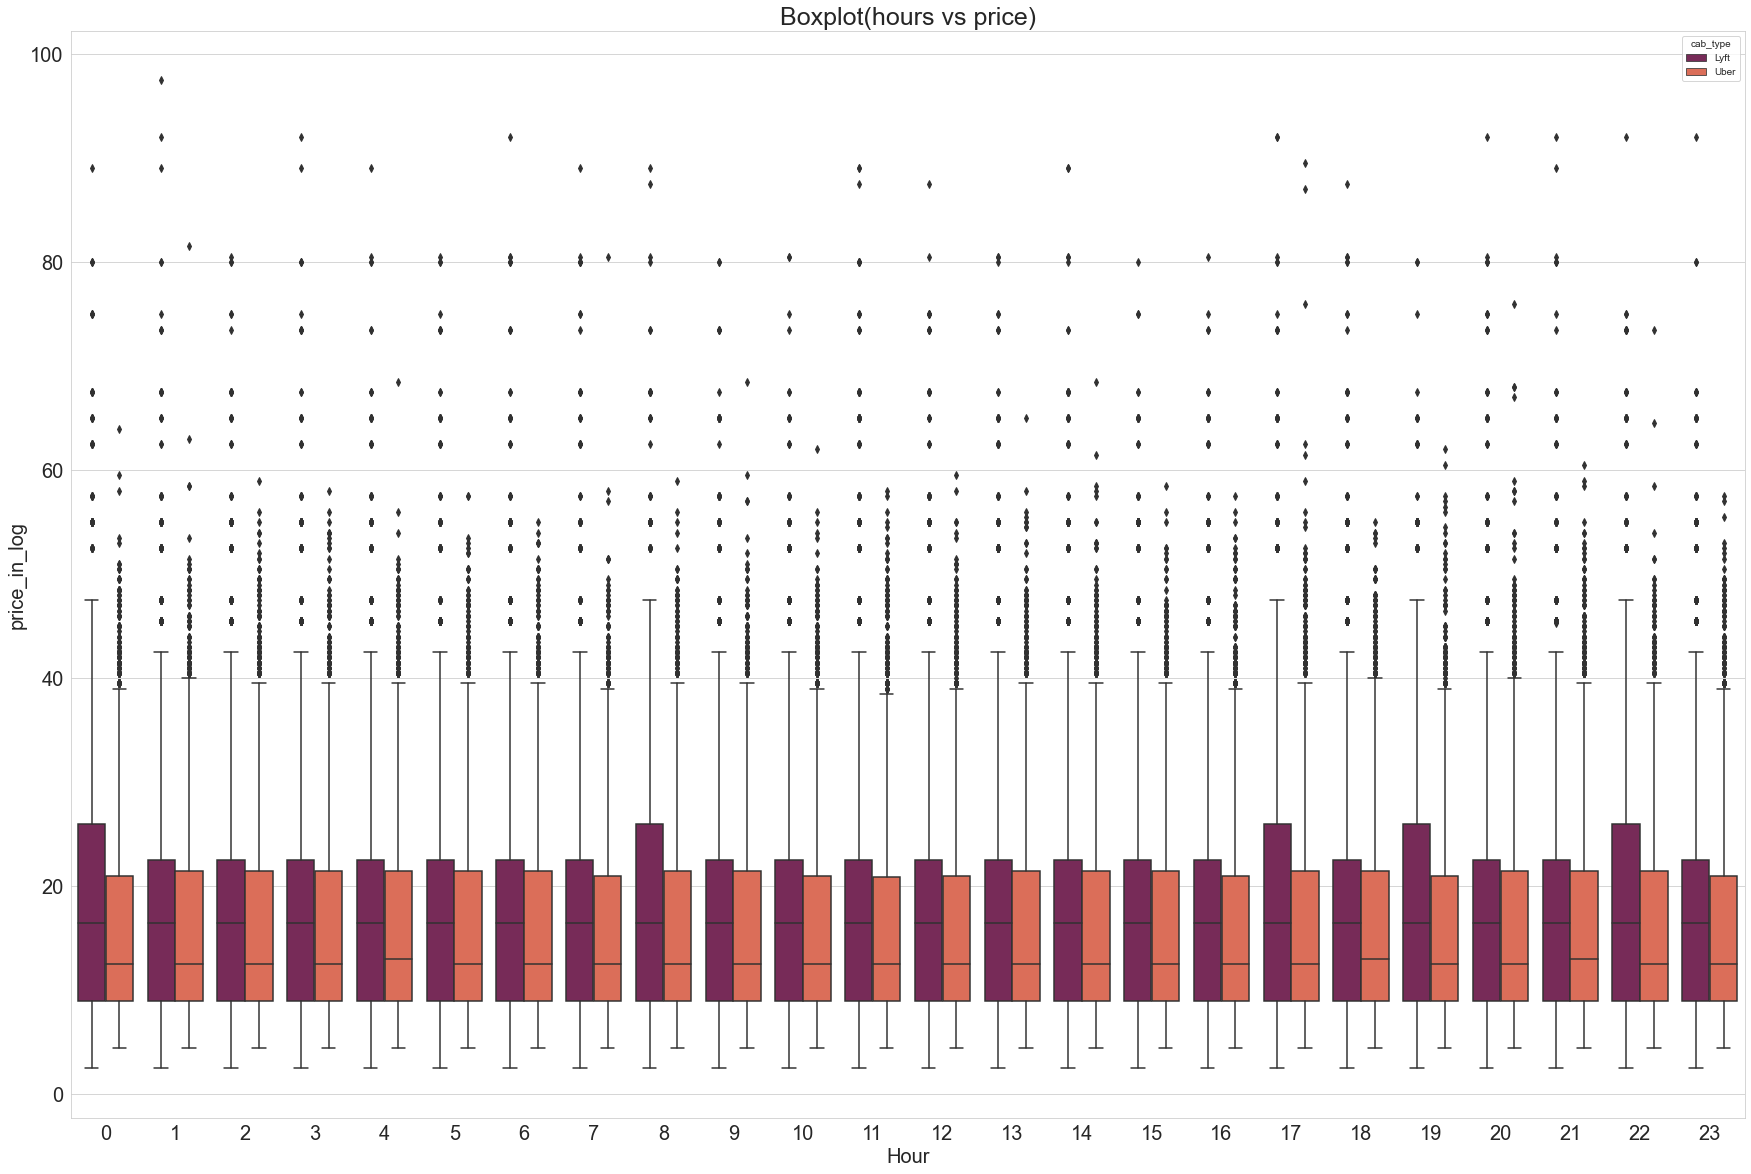

In [280]:
plt.figure(figsize=(30,20))
sns.set_style("whitegrid")
sns.boxplot(x="hour", y="price",data=data, hue="cab_type",palette="rocket")
plt.xticks(fontsize= 20)
plt.yticks(fontsize= 20)
plt.xlabel("Hour",fontsize=20)
plt.ylabel("price_in_log",fontsize=20)
plt.title("Boxplot(hours vs price)",fontsize=25)
plt.show()

([<matplotlib.patches.Wedge at 0x2069f7b14c0>,
 [Text(1.0597627504857359, 0.2947929997182905, 'UberXL'),
  Text(0.7553116107499992, 0.799690171670405, 'WAV'),
  Text(0.23387277198155568, 1.0748504670537495, 'Black SUV'),
  Text(-0.35474844530132504, 1.041226939987769, 'Black'),
  Text(-0.841451521286754, 0.7084908872555861, 'UberX'),
  Text(-1.0864298865317048, 0.17225011364497578, 'UberPool'),
  Text(-1.0270074064013839, -0.39402510985558137, 'Lux'),
  Text(-0.7085198984448698, -0.841427093400059, 'Lyft'),
  Text(-0.21342775843497525, -1.0790961921577806, 'Lux Black XL'),
  Text(0.334863072015536, -1.0477913547077577, 'Lyft XL'),
  Text(0.7996864236395946, -0.755315578977764, 'Lux Black'),
  Text(1.0651784093739083, -0.27458141998990193, 'Shared')],
 [Text(0.5780524093558559, 0.16079618166452206, '9%'),
  Text(0.41198815131818134, 0.43619463909294814, '9%'),
  Text(0.12756696653539398, 0.5862820729384087, '9%'),
  Text(-0.19349915198254092, 0.5679419672660557, '9%'),
  Text(-0.4589735

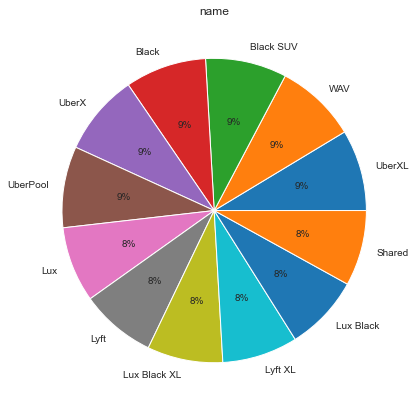

In [331]:
plt.figure(figsize=(7,7))
plt.title('name')
plt.pie(
    data['name'].value_counts(),
    labels=list(data['name'].value_counts().index),
    autopct ='%1.f%%'
)

0         Morning
1         Morning
2         Morning
3         Morning
4         Morning
           ...   
693065      Night
693066      Night
693067      Night
693069      Night
693070      Night
Name: hour, Length: 637976, dtype: category
Categories (4, object): ['Morning' < 'Afternoon' < 'Evening' < 'Night']

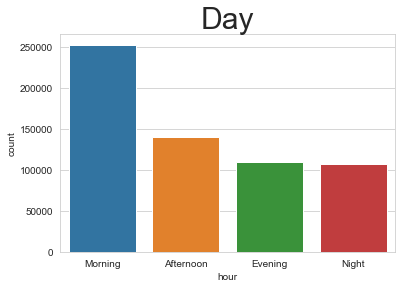

In [281]:
#Number of rides during the parts of the day
day=pd.cut(x=data['hour'],bins=[0,10,15,19,23],labels = ['Morning','Afternoon','Evening','Night'])
plt.title('Day',fontsize=30)
sns.countplot(x=day)
day

Dari plot diatas dapat ditarik kesimpulan bahwa waktu pemesanan terbanyaknya dilakukan pada pagi hari

7.00     52314
16.50    44351
10.50    40590
13.50    33707
9.00     30884
         ...  
89.50        1
81.50        1
64.50        1
87.00        1
19.35        1
Name: price, Length: 147, dtype: int64

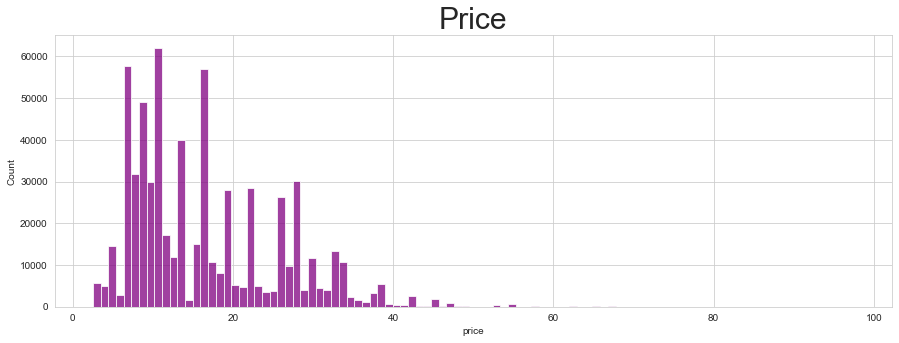

In [336]:
#show distribution of price
bins = np.linspace(data['price'].min(),data['price'].max(),100)
count=data['price'].value_counts()
plt.figure(figsize=(15,5))
plt.title('Price',fontsize=30)
sns.histplot(x='price',data=data,bins=bins, color='purple')
count

grafik diatas merupakan distribusi dari harga tarif transaksi yang telah dilakukan.

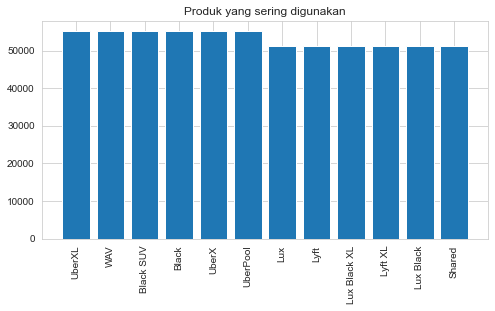

In [283]:
# visualisasi produk yang sering digunakan
plt.figure(figsize=[8,4])
plt.bar(data['name'].value_counts().index, data['name'].value_counts())
plt.xticks(rotation=90)
plt.title('Produk yang sering digunakan')
plt.show()

## F. Data Preprocessing

In [284]:
# Menggabungkan fitur source dan destination
data['rute'] = data['source'] + " to " + data['destination']

In [285]:
data.drop(['source', 'destination'], axis=1, inplace=True)

,surge_multiplier,distance,price
surge_multiplier,1.000000,0.025946,0.240458
distance,0.025946,1.000000,0.345061
price,0.240458,0.345061,1.000000


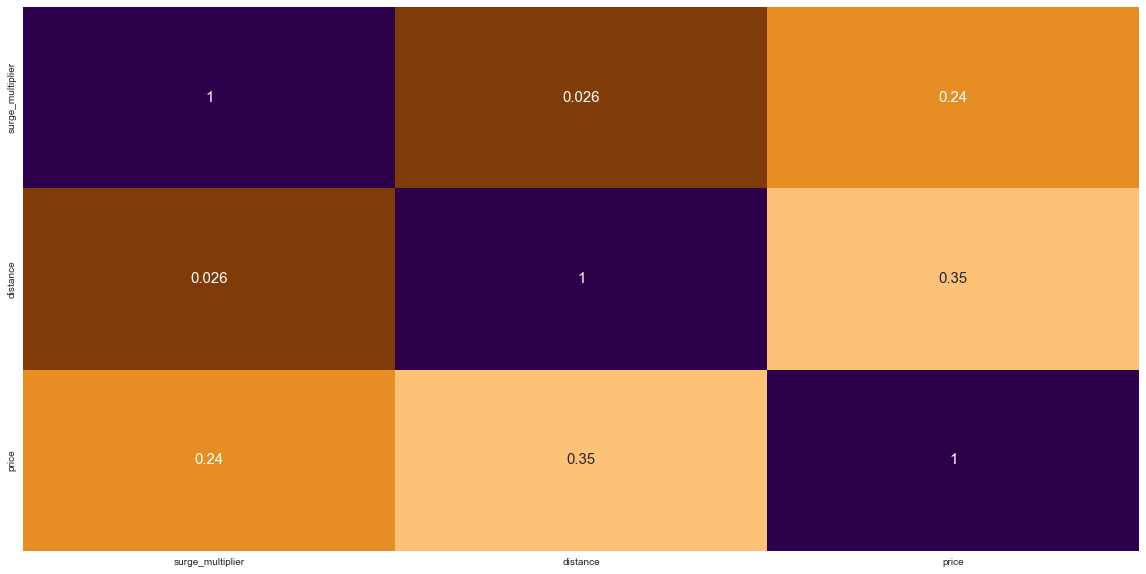

In [286]:
temp= ['surge_multiplier','distance','price']
plt.figure(figsize=(20, 10))
temp_corr=data[temp].corr()
sns.heatmap(temp_corr, annot=True,cmap='PuOr',cbar=False,annot_kws={"size":15})
temp_corr

,timestamp,temperature,apparentTemperature,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,temperatureMin,temperatureHighTime,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,uvIndexTime,temperatureMinTime,temperatureMaxTime,apparentTemperatureMinTime,apparentTemperatureMaxTime,price
timestamp,1.000000,-0.249027,-0.226472,-0.228324,-0.366885,-0.215550,-0.402043,-0.307194,0.999332,-0.186495,-0.378538,-0.157891,0.999364,0.998195,0.999290,0.998288,0.999276,0.000808
temperature,-0.249027,1.000000,0.946157,0.788564,0.502193,0.710386,0.382828,0.789220,-0.257457,0.780426,0.817443,0.703078,-0.254755,-0.242993,-0.254172,-0.231811,-0.255578,-0.000084
apparentTemperature,-0.226472,0.946157,1.000000,0.821492,0.573985,0.811624,0.495844,0.697343,-0.233333,0.792476,0.786478,0.782255,-0.231526,-0.224970,-0.227930,-0.212681,-0.228891,-0.000193
temperatureHigh,-0.228324,0.788564,0.821492,1.000000,0.611616,0.958722,0.534808,0.794579,-0.231465,0.985996,0.877508,0.951037,-0.228424,-0.214435,-0.226153,-0.205927,-0.227134,-0.000516
temperatureLow,-0.366885,0.502193,0.573985,0.611616,1.000000,0.629284,0.933931,0.473054,-0.366003,0.567522,0.636257,0.579368,-0.369039,-0.383572,-0.360347,-0.367621,-0.362016,0.000182
apparentTemperatureHigh,-0.215550,0.710386,0.811624,0.958722,0.629284,1.000000,0.602182,0.665030,-0.218425,0.926408,0.791979,0.974276,-0.215812,-0.206880,-0.211708,-0.197785,-0.212270,-0.000261
apparentTemperatureLow,-0.402043,0.382828,0.495844,0.534808,0.933931,0.602182,1.000000,0.284247,-0.400401,0.492195,0.479351,0.558125,-0.403237,-0.416470,-0.395025,-0.404343,-0.396456,0.000831
temperatureMin,-0.307194,0.789220,0.697343,0.794579,0.473054,0.665030,0.284247,1.000000,-0.309989,0.782981,0.953828,0.648346,-0.307319,-0.294846,-0.306820,-0.278686,-0.308906,-0.000428
temperatureHighTime,0.999332,-0.257457,-0.233333,-0.231465,-0.366003,-0.218425,-0.400401,-0.309989,1.000000,-0.188985,-0.381595,-0.159892,0.999909,0.998486,0.999885,0.998537,0.999885,0.000759
temperatureMax,-0.186495,0.780426,0.792476,0.985996,0.567522,0.926408,0.492195,0.782981,-0.188985,1.000000,0.838385,0.956333,-0.185573,-0.168262,-0.185704,-0.162329,-0.186854,-0.000550


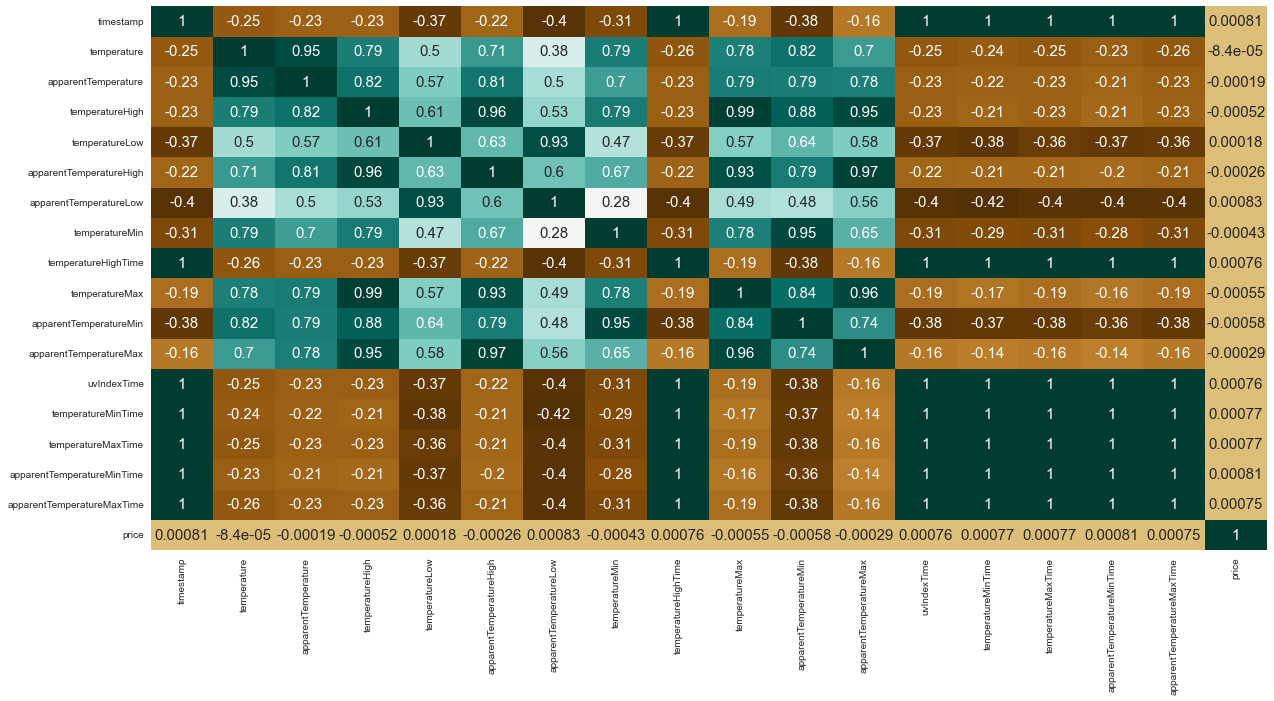

In [287]:
temp=['timestamp','datetime','long_summary','temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
            'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax',
             'uvIndexTime','temperatureMinTime','temperatureMaxTime','apparentTemperatureMinTime','apparentTemperatureMaxTime','price']
plt.figure(figsize=(20,10))
temp_corr=data[temp].corr()
sns.heatmap(temp_corr,annot=True,cmap='BrBG',cbar=False,annot_kws={"size": 15})
temp_corr

In [288]:
for col in temp:
    if col=='price':
        continue
    data.drop(col,axis=1, inplace=True)
data

,id,hour,day,month,timezone,cab_type,product_id,name,price,distance,...,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,rute
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,9,16,12,America/New_York,Lyft,lyft_line,Shared,5.0,0.44,...,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,Haymarket Square to North Station
1,4bd23055-6827-41c6-b23b-3c491f24e74d,2,27,11,America/New_York,Lyft,lyft_premier,Lux,11.0,0.44,...,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,Haymarket Square to North Station
2,981a3613-77af-4620-a42a-0c0866077d1e,1,28,11,America/New_York,Lyft,lyft,Lyft,7.0,0.44,...,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,Haymarket Square to North Station
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,4,30,11,America/New_York,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,...,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,Haymarket Square to North Station
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,3,29,11,America/New_York,Lyft,lyft_plus,Lyft XL,9.0,0.44,...,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,Haymarket Square to North Station
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,353e6566-b272-479e-a9c6-98bd6cb23f25,23,1,12,America/New_York,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,9.5,1.00,...,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0000,West End to North End
693066,616d3611-1820-450a-9845-a9ff304a4842,23,1,12,America/New_York,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,1.00,...,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0000,West End to North End
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,23,1,12,America/New_York,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,9.5,1.00,...,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0000,West End to North End
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,23,1,12,America/New_York,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.0,1.00,...,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0000,West End to North End


In [289]:
fitur = ['distance', 'surge_multiplier', 'product_id','name', 'cab_type', 'rute']

In [290]:
X = data[fitur]
y = data['price']

In [291]:
ke = X.keys()
print(ke)

Index(['distance', 'surge_multiplier', 'product_id', 'name', 'cab_type',
       'rute'],
      dtype='object')


In [321]:
X.head()

,distance,surge_multiplier,product_id,cab_type,rute,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV
0,0.44,1.0,7,0,33,0,0,0,0,0,0,0,1,0,0,0,0
1,0.44,1.0,11,0,33,0,0,1,0,0,0,0,0,0,0,0,0
2,0.44,1.0,6,0,33,0,0,0,0,0,1,0,0,0,0,0,0
3,0.44,1.0,9,0,33,0,0,0,0,1,0,0,0,0,0,0,0
4,0.44,1.0,10,0,33,0,0,0,0,0,0,1,0,0,0,0,0


In [322]:
y.head()

0     5.0
1    11.0
2     7.0
3    26.0
4     9.0
Name: price, dtype: float64

In [294]:
coll = ['product_id','cab_type', 'rute']
label = LabelEncoder()
for col in coll:
    X[col] = label.fit_transform(X[col])
X

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19116\2991000207.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label.fit_transform(X[col])


,distance,surge_multiplier,product_id,name,cab_type,rute
0,0.44,1.0,7,Shared,0,33
1,0.44,1.0,11,Lux,0,33
2,0.44,1.0,6,Lyft,0,33
3,0.44,1.0,9,Lux Black XL,0,33
4,0.44,1.0,10,Lyft XL,0,33
...,...,...,...,...,...,...
693065,1.00,1.0,5,WAV,1,69
693066,1.00,1.0,3,UberXL,1,69
693067,1.00,1.0,0,UberX,1,69
693069,1.00,1.0,2,Black SUV,1,69


In [295]:
en = pd.get_dummies(X['name'])
en

,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV
0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
693065,0,0,0,0,0,0,0,0,0,0,0,1
693066,0,0,0,0,0,0,0,0,0,0,1,0
693067,0,0,0,0,0,0,0,0,0,1,0,0
693069,0,1,0,0,0,0,0,0,0,0,0,0


In [296]:
X = X.join(en)

In [297]:
X.drop(['name'], axis=1, inplace=True)
X

,distance,surge_multiplier,product_id,cab_type,rute,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV
0,0.44,1.0,7,0,33,0,0,0,0,0,0,0,1,0,0,0,0
1,0.44,1.0,11,0,33,0,0,1,0,0,0,0,0,0,0,0,0
2,0.44,1.0,6,0,33,0,0,0,0,0,1,0,0,0,0,0,0
3,0.44,1.0,9,0,33,0,0,0,0,1,0,0,0,0,0,0,0
4,0.44,1.0,10,0,33,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,1.00,1.0,5,1,69,0,0,0,0,0,0,0,0,0,0,0,1
693066,1.00,1.0,3,1,69,0,0,0,0,0,0,0,0,0,0,1,0
693067,1.00,1.0,0,1,69,0,0,0,0,0,0,0,0,0,1,0,0
693069,1.00,1.0,2,1,69,0,1,0,0,0,0,0,0,0,0,0,0


# g. Modeling

## 1. Logistic Regression

In [298]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33, shuffle=True)
print('ukuran dari X_train : ' , X_train.shape)
print('ukuran dari X_test : ' , X_test.shape)
print('ukuran dari y_train : ' , y_train.shape)
print('ukuran dari y_test : ' , y_test.shape)

ukuran dari X_train :  (446583, 17)
ukuran dari X_test :  (191393, 17)
ukuran dari y_train :  (446583,)
ukuran dari y_test :  (191393,)


In [312]:
print("{0:0.2f}% ada pada training set".format((len(X_train)/len(data.index)) * 100))
print("{0:0.2f}% ada pada test set".format((len(X_test)/len(data.index)) * 100))

70.00% ada pada training set
30.00% ada pada test set


In [299]:
LR = LinearRegression()

In [300]:
LR.fit(X_train, y_train)

LinearRegression()

In [301]:
print('coefficient of determination: ', LR.score(X_train, y_train))
print('intercert: ', LR.intercept_)
print('slope: ' , LR.coef_)

coefficient of determination:  0.9273651533646993
intercert:  6293254726.783603
slope:  [ 2.80547872e+00  1.83808033e+01  1.35437630e+09 -1.88069379e+10
  5.19681311e-03  1.11593069e+10  9.80493059e+09 -2.11913941e+10
 -1.71282651e+10 -1.84826414e+10 -1.44195126e+10 -1.98370178e+10
 -1.57738889e+10  7.09617796e+09  1.25136832e+10  8.45055427e+09
  5.74180166e+09]


In [302]:
y_pred = LR.intercept_ + np.sum(LR.coef_* X_test, axis=1)
print('predicted response: ', y_pred, sep='\n')

predicted response: 
412085     3.664508
200606    45.017859
378179    11.515021
507174    19.832255
523327    24.718549
            ...    
122454    10.430069
2678      27.206061
655051    26.316804
337407     9.980912
74898     12.888303
Length: 191393, dtype: float64


In [326]:
# Nilai pada Coefficient of determination yang menggunakan r2_score lebih besar dari prediksi score biasa
print('Coefficient of determination: %.3f' % r2_score(y_test,y_pred))

Coefficient of determination: 0.968


In [303]:
# menampilkan hasil prediksi
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [304]:
result.head(10)

,Actual,Predicted
412085,7.0,3.664508
200606,45.0,45.017859
378179,13.5,11.515021
507174,19.5,19.832255
523327,22.5,24.718549
165765,7.0,8.272632
16815,10.5,11.213418
288754,8.5,7.599423
215169,16.5,15.501452
197492,26.0,31.573228


In [305]:
LR.score(X_train, y_train)

0.9273651533646993

In [306]:
LR.score(X_test, y_test)

0.9275015505549611

## 2. DecisionTree

In [307]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33, shuffle=True)
print('ukuran dari X_train : ' , X_train.shape)
print('ukuran dari X_test : ' , X_test.shape)
print('ukuran dari y_train : ' , y_train.shape)
print('ukuran dari y_test : ' , y_test.shape)

ukuran dari X_train :  (446583, 17)
ukuran dari X_test :  (191393, 17)
ukuran dari y_train :  (446583,)
ukuran dari y_test :  (191393,)


In [313]:
print("{0:0.2f}% ada pada training set".format((len(X_train)/len(data.index)) * 100))
print("{0:0.2f}% ada pada test set".format((len(X_test)/len(data.index)) * 100))

70.00% ada pada training set
30.00% ada pada test set


In [308]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [309]:
print('DecisionTree Train Score : ' , dtr.score(X_train, y_train))
print('DecisionTree Test Score : ' , dtr.score(X_test, y_test))

DecisionTree Train Score :  0.9735325642480992
DecisionTree Test Score :  0.9680419721828235


In [327]:
y_pred1 = dtr.predict(X_test)
y_pred1

array([ 6.05300353, 49.1030303 , 12.25      , ..., 26.82915718,
        9.64074074, 13.10714286])

# H. Kesimpulan

In [330]:
# Menampilkan hasil test score dari LinearRegression dan DecisionTree
print('LinearRegression Train Score : ' , LR.score(X_test, y_test))
print('DecisionTree Test Score : ' , dtr.score(X_test, y_test))

# Nilai pada Linearregression yang menggunakan r2_score lebih besar dari prediksi score biasa
print('LinearRegression with r2_score: %.3f' % r2_score(y_test,y_pred))

LinearRegression Train Score :  0.9275015505549611
DecisionTree Test Score :  0.9680419721828235
LinearRegression with r2_score: 0.968


Berdasarkan model diatas dapat ditarik kesimpulan bahwa kedua nilai prediksi tidak jauh berbeda. Namun, nilai prediksi dari model DecisionTree lebih baik dari Linear Regression. Jadi untuk melakukan prediction disarankan menggunakan DecisionTree